# Dt: 7/05/2025

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
visa_df = pd.read_csv(r"C:\Users\Acer\OneDrive\Data Science\Data Analysis\Numpy\Visadataset.csv")
cat = visa_df.select_dtypes(include = 'object').columns
num = visa_df.select_dtypes(exclude = 'object').columns

# Scaling

- We have two scale methods

    - 1. Z-Score

    - 2. MinMaxScore

<img class="XqHOTb IGEbUc" alt="Z = \frac{x - \mu}{\sigma}" src="https://www.gstatic.com/education/formulas2/553212783/en/z_score.svg" role="img" data-csiid="ZiciaOfoPJLT2roPw_rOsA8_15" data-atf="1">

In [2]:
# Step-1: x =  Take Prevailing wage data
# Step-2: Calculate mean = u
# Step-3: Calculate std = sigma
# Step-4: Calculate Nr = step1-step2
# Step-5: Z = step4/step3
# Step-6: Create a new column for prevailing_wage_z
# Step-7: Draw the distribution plot for both prevailing_wage and pwage_z

# Observation: Even though values are modified data distribution

In [20]:
x= visa_df['prevailing_wage']
u = np.mean(x)
sigma = np.std(x)
visa_df['pwage_z'] = (x-u)/sigma
visa_df[['prevailing_wage','pwage_z']]

,prevailing_wage,pwage_z
0,592.2029,-1.398537
1,83425.6500,0.169835
2,122996.8600,0.919079
3,83434.0300,0.169994
4,149907.3900,1.428604
...,...,...
25475,77092.5700,0.049924
25476,279174.7900,3.876159
25477,146298.8500,1.360280
25478,86154.7700,0.221509


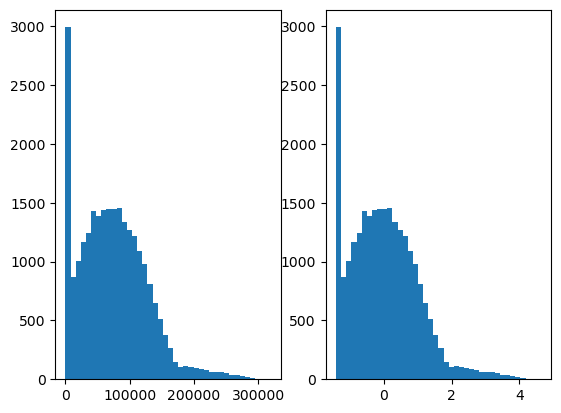

In [18]:
plt.subplot(1,2,1).hist(visa_df['prevailing_wage'], bins =40)
plt.subplot(1,2,2).hist(visa_df['pwage_z'], bins =40)
plt.show()

In [12]:
visa_df = pd.read_csv(r"C:\Users\Acer\OneDrive\Data Science\Data Analysis\Numpy\Visadataset.csv")
cat = visa_df.select_dtypes(include = 'object').columns
num = visa_df.select_dtypes(exclude = 'object').columns
result_df = pd.DataFrame()
for i in num:
    x= visa_df[i]
    u = np.mean(x)
    sigma = np.std(x)
    result_df[f'{i}_z'] = (x-u)/sigma
result_df


,no_of_employees_z,yr_of_estab_z,prevailing_wage_z
0,0.386667,0.651230,-1.398537
1,-0.142282,0.533211,0.169835
2,1.694984,0.674834,0.919079
3,-0.243429,-1.945186,0.169994
4,-0.200417,0.604022,1.428604
...,...,...,...
25475,-0.134020,0.674834,0.049924
25476,-0.104603,0.627626,3.876159
25477,-0.198713,-1.638337,1.360280
25478,-0.163875,-2.181224,0.221509


In [ ]:
# Standard Scalar

- sklearn

    -preprocessing

        - standard scalar



In [21]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

visa_df['p_wage_ss'] = ss.fit_transform(visa_df[['prevailing_wage']])
visa_df[['prevailing_wage', 'pwage_z','p_wage_ss']]


,prevailing_wage,pwage_z,p_wage_ss
0,592.2029,-1.398537,-1.398537
1,83425.6500,0.169835,0.169835
2,122996.8600,0.919079,0.919079
3,83434.0300,0.169994,0.169994
4,149907.3900,1.428604,1.428604
...,...,...,...
25475,77092.5700,0.049924,0.049924
25476,279174.7900,3.876159,3.876159
25477,146298.8500,1.360280,1.360280
25478,86154.7700,0.221509,0.221509


In [25]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
result_df = pd.DataFrame()
for i in num[1:]:
    result_df[f'{i}_ss'] = ss.fit_transform(visa_df[[i]])
result_df

ValueError: Cannot set a frame with no defined index and a value that cannot be converted to a Series

# Normalization

<img src="https://media.licdn.com/dms/image/v2/D4D12AQGP8LwyQQfojw/article-cover_image-shrink_600_2000/article-cover_image-shrink_600_2000/0/1669525006395?e=2147483647&amp;v=beta&amp;t=jVVelw4mmMSTUmq24Qjo1zli5Oe7pz-D1cSNougg5Wo" jsaction="" class="sFlh5c FyHeAf iPVvYb" style="max-width: 363px; height: 113px; margin: 16.5px 0px; width: 305px;" alt="Min-Max Normalization" jsname="kn3ccd">

In [ ]:
# Step-1: read the prevailing wage data x
# Step-2 : Calcumate X-min
# Step-3 : Calculate X-max
# Step-4  : Nr: x-xmin
# Step-5 : Dr = Xmax - Xmin
# Step-6 : Nr/Dr

In [38]:
x = visa_df['prevailing_wage']
x_max = np.max(x)
x_min = np.min(x)
Nr = x-x_min
Dr = x_max-x_min
visa_df['p_wage_norm'] = Nr/Dr
visa_df[['p_wage_norm']]

,p_wage_norm
0,0.001849
1,0.261345
2,0.385312
3,0.261371
4,0.469616
...,...
25475,0.241505
25476,0.874579
25477,0.458311
25478,0.269895


In [40]:
# idx max will give an ID where each column value has Maximum
visa_df[['prevailing_wage','p_wage_norm']].idxmax()

prevailing_wage    21077
p_wage_norm        21077
dtype: int64

In [39]:
# idx min will give an ID where each column value has Maximum
visa_df[['prevailing_wage','p_wage_norm']].idxmin()

prevailing_wage    20575
p_wage_norm        20575
dtype: int64

In [41]:
visa_df.iloc[[21077,20575]]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,p_wage_ss,pwage_z,x_mmscalar,p_wage_skmms,p_wage_norm
21077,EZYV21078,Asia,High School,N,N,442,2006,Midwest,319210.2700,Year,Y,Denied,4.634193,4.634193,1.0,4.634193,1.0
20575,EZYV20576,North America,Master's,N,N,1552,2004,Northeast,2.1367,Hour,Y,Certified,-1.409710,-1.409710,0.0,-1.409710,0.0


In [43]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
visa_df['p_wage_skmms'] = mms.fit_transform(visa_df[['prevailing_wage']])
visa_df[['p_wage_skmms','x_mmscalar']]

,p_wage_skmms,x_mmscalar
0,0.001849,0.001849
1,0.261345,0.261345
2,0.385312,0.385312
3,0.261371,0.261371
4,0.469616,0.469616
...,...,...
25475,0.241505,0.241505
25476,0.874579,0.874579
25477,0.458311,0.458311
25478,0.269895,0.269895
